In [6]:
%matplotlib inline

In [372]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [371]:
def sir(total_pop, beta, gamma):
    """
    beta - infection rate
    gamma - recovery rate
    S = susceptable
    I = infected
    R = recovered 
    """
    I = 200
    S = total_pop - I
    R = 0
    t = 0
    ss = []
    ii = []
    rr = []
    nc = []
    while t < 100:
        ss += [S]
        ii += [I]
        rr += [R]
        
        new_r = gamma * I 
        new_i = beta * S * I
        nc += [new_i]
        R = R + new_r
        I = I + new_i - new_r
        S = S - new_i
        
        t += 1
    return ss, ii, rr, nc

        


In [ ]:
from bs4 import BeautifulSoup

def fetch_cdc_cases():
    

In [816]:
cases = np.array([0.000001,0.00001,1,0.00001,1,0.00001,3,1,1,3,2,0.00001,0.00001,5,10,6,7,11,14,13,34,16,30,19,40,40,53,51,48,58,74,43,79,46,50,15,2,0.00001])

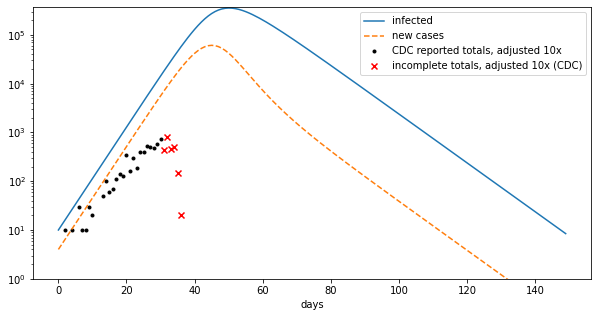

peak infected patients of 353385 on 2020-03-25
peak new cases of 60814 on day 2020-03-20
0.28761842196126175% of population, 1006664.4768644162 were infected at one point by day 150
20133 people die by day 150 (assuming a 2% fatality rate)


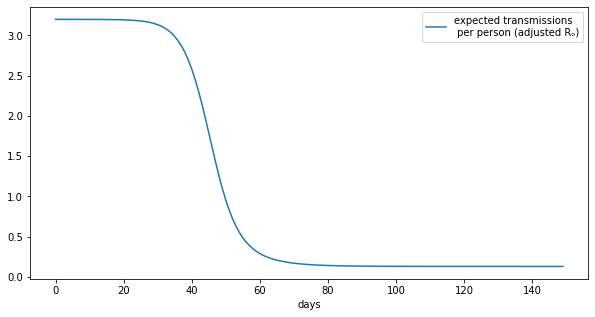

In [829]:
infection_time = 8
sp = pd.read_csv("~/Downloads/^GSPC.csv")

from datetime import datetime, timedelta
inverse_time = 1 / infection_time 
s, i, r, b, n = sir_beta(350000000, 0.40, inverse_time, 1113)
t = np.array(range(0, 150))
plt.figure(figsize=(10,5))

plt.plot(t , i, label='infected')
plt.plot(t , np.array(n), '--', label='new cases')
plt.scatter(t[:len(cases) - 7], cases[:-7] * 10, marker='.', c='k', label='CDC reported totals, adjusted 10x')
plt.scatter(t[len(cases) - 7: len(cases)], cases[-7:] * 10, marker='x', c='r',label='incomplete totals, adjusted 10x (CDC)')
plt.ylim(bottom=1)  
plt.yscale('log')

plt.xlabel('days')
plt.legend(loc='upper right')
plt.show()



print("peak infected patients of {0} on {1}".format(int(max(i)), timedelta(days=int(np.argmax(i))) + datetime(day=4, month=2, year=2020).date()))
print("peak new cases of {0} on day {1}".format(int(max(n)), timedelta(days=int(np.argmax(n))) + datetime(day=4, month=2, year=2020).date()))
print("{}% of population, {} were infected at one point by day {}".format(max(r) / (float(s[0] + i[0] + r[0])) * 100, max(r), len(r)) )
print("{} people die by day {} (assuming a 2% fatality rate)".format( int(max(r) * 0.02), len(r)))
plt.figure(figsize=(10,5))

plt.plot(t, [a / inverse_time for a in b], label='expected transmissions \n per person (adjusted Rₒ)')
plt.legend()
plt.xlabel('days')

plt.show()


In [806]:
s, i, r = sir(8500000, (1 / 8500000.0) * 0.5, 0.2)

ValueError: too many values to unpack (expected 3)

ValueError: x and y must have same first dimension, but have shapes (100,) and (150,)

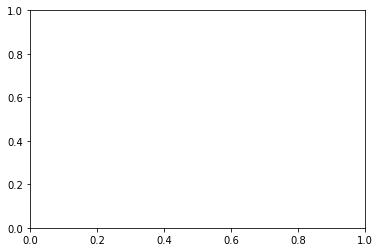

In [432]:
t = range(0, 100)
plt.plot(t, s, label='susceptable')
plt.plot(t, i, label='infected')
plt.plot(t, r, label='recovered')
plt.legend()
plt.show()
print("peak infections of {0} at day {1}".format(int(max(i)), np.argmax(i)))
print("{}% of population was infected at one point by day {}".format(max(r) / (float(s[0] + i[0] + r[0])) * 100, len(r)) )
print("{} people die by day 100 (assuming 2% fatality rate)".format( int(max(r) * 0.02)))

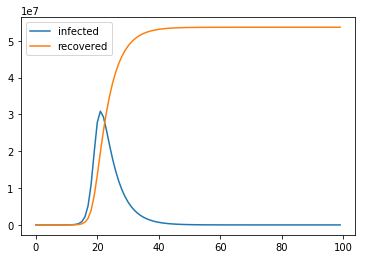

peak infections of 30861018.642755907 at day 21
